In [9]:
#构建实验语料库
corpus = ["我特别特别喜欢看电影",
    "这部电影真的是很好看的电影",
    "今天天气真好是难得的好天气",
    "我今天去看了一部电影",
    "电影院的电影都很好看"]

In [10]:
#给句子分词
import jieba

corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]

In [11]:
#创建词汇表
word_dist = {}
#遍历分词后的语料库
for sentence in corpus_tokenized:
    for word in sentence:
        if word not in word_dist:
            word_dist[word] = len(word_dist)
print("词汇表：",word_dist)

词汇表： {'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


In [12]:
#生成词袋表示
bow_vectors=[]
#遍历分词后的语料库
for sentence in corpus_tokenized:
    #初始化一个全0向量，其长度等于词汇表大小
    sentence_vector = [0]*len(word_dist)
    for word in sentence:
        #给对应词索引位置上的数加1，表示该词在当前句子中出现了一次
        sentence_vector[word_dist[word]] += 1
    #将当前句子的词袋向量添加到向量列表中
    bow_vectors.append(sentence_vector)
print("词袋表示：",bow_vectors)

词袋表示： [[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


In [13]:
#计算余弦相似度
import numpy as np
#定义余弦相似函数
def cosine_similarity(vec1,vec2):
    dot_product = np.dot(vec1,vec2) #计算向量vec1和vec2的点积
    norm_a = np.linalg.norm(vec1) #计算向量的范数
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a*norm_b) # 返回余弦相似度
#初始化一个全0矩阵，用于存储余弦相似度
similarity_matrix = np.zeros((len(corpus),len(corpus)))
#计算每两个句子之间的余弦相似度
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j]= cosine_similarity(bow_vectors[i],bow_vectors[j])


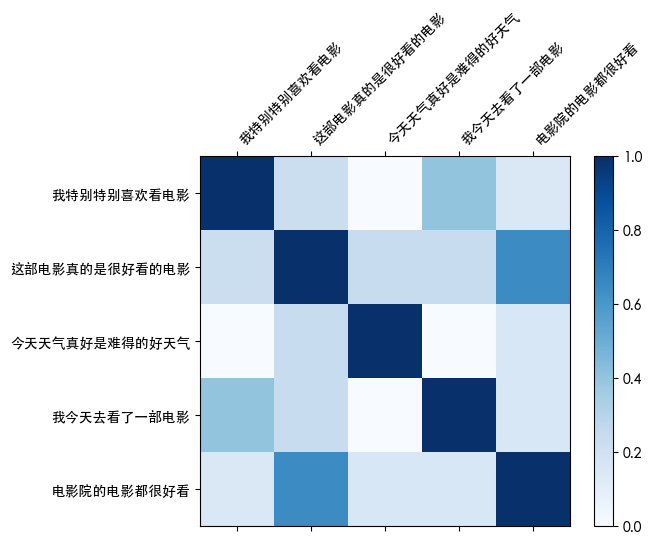

In [14]:
#可视化余弦相似度
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["Heiti TC"] #设定字体样式
plt.rcParams["font.sans-serif"] = ["Heiti TC"] # 设定无衬线字体样式
plt.rcParams["axes.unicode_minus"] = False #用来正常显示负号
# plt.rcParams['fontManager.addfont']([font_path])  # 添加字体文件路径
fig,ax = plt.subplots() #创建一个绘图库
#使用matshow函数绘制余弦相似度矩阵，颜色使用蓝色色调
cax = ax.matshow(similarity_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax) # 条形图颜色映射
ax.set_xticks(range(len(corpus))) #x轴刻度
ax.set_yticks(range(len(corpus))) #y轴刻度
ax.set_xticklabels(corpus,rotation=45,ha='left') #刻度标签
ax.set_yticklabels(corpus) #刻度标签为原始句子
plt.show()
